# Deploying A Perceptron

In [2]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#ML/DL
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv('mnist_train.csv')
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(60000, 785)

### MNSIT Dataset
- MNIST: Modified National Institute of Stand and Tech
- Considered the "Hello, World" of Deep Learning
- A large set of handwritten digits that can be trained for image processing
- Black and white images wer normalized to fit into a 28x28 pixel bounding box with greyscale levels
- 28 x 28 + 1(label) = 785 columns

In [5]:
df.isna().sum().sum()

0

In [6]:
# splitting the data into features and target (x and y)
X = df.drop(columns='label')

y = df['label']

In [7]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=4)

In [8]:
per = Perceptron()

In [9]:
per.fit(X_train,y_train)

Perceptron()

In [10]:
y_pred = per.predict(X_test)
y_pred

array([2, 7, 6, ..., 6, 4, 2])

In [11]:
np.unique(y_pred)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
accur = accuracy_score(y_test,y_pred)
print(f'Accuracy score: {accur:.2f}')

Accuracy score: 0.87


In [13]:
pd.DataFrame(data = {'actual': y_test, 'predicted': y_pred})

,actual,predicted
41382,2,2
20883,7,7
13621,6,6
41823,1,1
33839,8,8
...,...,...
34502,0,0
730,7,7
17814,6,6
37767,4,4


In [16]:
df[df['label']==5].head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
sample_images = df[df['label']==5].head().drop(columns='label').head(1).values.reshape(28,28)
print(sample_images)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [22]:
sample_lables = df[df['label']==5]['label'].head(1)
sample_lables

0    5
Name: label, dtype: int64

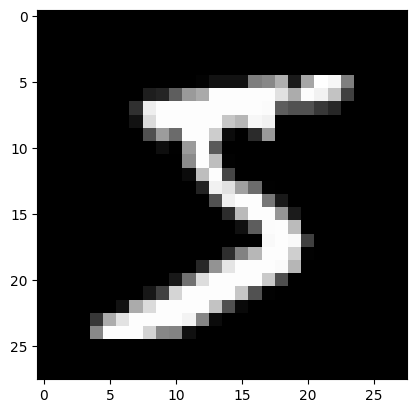

In [23]:
plt.imshow(sample_images, cmap='gray')

In [33]:
num_samples = 3
digit = 6

sample_images = df[df['label']==digit].head().drop(columns='label').head(num_samples).values.reshape(num_samples,28,28)

sample_lables = df[df['label']==digit]['label'].head(num_samples)



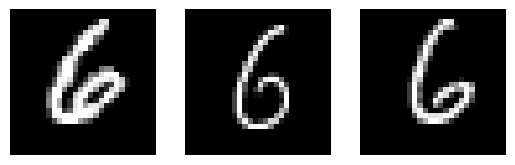

In [34]:
for i in range(num_samples):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(sample_images[i], cmap='gray')
    plt.axis('off')

In [35]:
np.max(sample_images[0])

255